## data.lacity.org API

In [1]:
import warnings 
warnings.filterwarnings('ignore')     

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sodapy import Socrata
from config import password, username
import datetime
import dateutil
import scipy.stats as stats
import seaborn as sns
import gmplot
from IPython.display import display

In [3]:
#hold cell for tokenized requests
    #unauthenticated client only works with public data sets. Note 'None'
        #in place of application token, and no username or password:
        #client = Socrata("data.lacity.org", None)

#authenticated client request (needed for non-public datasets):
client = Socrata("data.lacity.org",
    app_token="hdI22XaCHRYX4ZbAtX4tMtBMi",
    username=username,
    password=password)

#first 100,000 results, returned as JSON from API / converted to Python list of
#dictionaries by sodapy
results = client.get("63jg-8b9z", limit=100000)

#convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head()
# results_df.shape

,area,area_name,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,crm_cd_desc,cross_street,date_occ,...,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd
0,13,Newton,900,900,NaN,NaN,NaN,VIOLATION OF COURT ORDER,NaN,2010-02-20T00:00:00.000,...,SINGLE FAMILY DWELLING,1385,AA,Adult Arrest,1350,48,H,M,NaN,NaN
1,14,Pacific,740,740,NaN,NaN,NaN,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",MANCHESTER AV,2010-09-12T00:00:00.000,...,STREET,1485,IC,Invest Cont,0045,0,W,M,NaN,NaN
2,13,Newton,946,946,NaN,NaN,NaN,OTHER MISCELLANEOUS CRIME,NaN,2010-08-09T00:00:00.000,...,ALLEY,1324,IC,Invest Cont,1515,0,H,M,NaN,NaN
3,06,Hollywood,900,900,998,NaN,NaN,VIOLATION OF COURT ORDER,HOLLYWOOD BL,2010-01-05T00:00:00.000,...,STREET,0646,IC,Invest Cont,0150,47,W,F,HAND GUN,102
4,01,Central,122,122,NaN,NaN,NaN,"RAPE, ATTEMPTED",SAN PEDRO ST,2010-01-02T00:00:00.000,...,ALLEY,0176,IC,Invest Cont,2100,47,H,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400


In [4]:
#select only required fields for analysis
subset_df = results_df.loc[:,('area', 'area_name', 'crm_cd', 'crm_cd_desc', 'date_occ', 'date_rptd', 'dr_no', 'lat', 'lon', 'location', 'mocodes', 'premis_cd', 'rpt_dist_no', 'time_occ')]
subset_df.head()
# subset_df.info()
# subset_df.shape

,area,area_name,crm_cd,crm_cd_desc,date_occ,date_rptd,dr_no,lat,lon,location,mocodes,premis_cd,rpt_dist_no,time_occ
0,13,Newton,900,VIOLATION OF COURT ORDER,2010-02-20T00:00:00.000,2010-02-20T00:00:00.000,001307355,33.9825,-118.2695,300 E GAGE AV,0913 1814 2000,501,1385,1350
1,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2010-09-12T00:00:00.000,2010-09-13T00:00:00.000,011401303,33.9599,-118.3962,SEPULVEDA BL,0329,101,1485,0045
2,13,Newton,946,OTHER MISCELLANEOUS CRIME,2010-08-09T00:00:00.000,2010-08-09T00:00:00.000,070309629,34.0224,-118.2524,1300 E 21ST ST,0344,103,1324,1515
3,06,Hollywood,900,VIOLATION OF COURT ORDER,2010-01-05T00:00:00.000,2010-01-05T00:00:00.000,090631215,34.1016,-118.3295,CAHUENGA BL,1100 0400 1402,101,0646,0150
4,01,Central,122,"RAPE, ATTEMPTED",2010-01-02T00:00:00.000,2010-01-03T00:00:00.000,100100501,34.0387,-118.2488,8TH ST,0400,103,0176,2100


In [5]:
#rename columns
subset_df.rename(
  columns={
    #0 : 'title',
    #1 : 'author'
    'area': 'Area ID', 
    'area_name': 'Area Name',
    'crm_cd': 'Crime Code',
    'crm_cd_desc': 'Crime Code Description',
    'date_occ': 'Date Occurred',
    'date_rptd': 'Date Reported',
    'dr_no': 'DR #',
    'lat': 'Latitude',
    'lon': 'Longitude',
    'location': 'Location',
    'mocodes': 'MO Code',
    'premis_cd': 'Premise Code',
    'rpt_dist_no': 'Reporting District',
    'time_occ': 'Time Occurred'
  },
  inplace=True
)
subset_df

,Area ID,Area Name,Crime Code,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,MO Code,Premise Code,Reporting District,Time Occurred
0,13,Newton,900,VIOLATION OF COURT ORDER,2010-02-20T00:00:00.000,2010-02-20T00:00:00.000,001307355,33.9825,-118.2695,300 E GAGE AV,0913 1814 2000,501,1385,1350
1,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2010-09-12T00:00:00.000,2010-09-13T00:00:00.000,011401303,33.9599,-118.3962,SEPULVEDA BL,0329,101,1485,0045
2,13,Newton,946,OTHER MISCELLANEOUS CRIME,2010-08-09T00:00:00.000,2010-08-09T00:00:00.000,070309629,34.0224,-118.2524,1300 E 21ST ST,0344,103,1324,1515
3,06,Hollywood,900,VIOLATION OF COURT ORDER,2010-01-05T00:00:00.000,2010-01-05T00:00:00.000,090631215,34.1016,-118.3295,CAHUENGA BL,1100 0400 1402,101,0646,0150
4,01,Central,122,"RAPE, ATTEMPTED",2010-01-02T00:00:00.000,2010-01-03T00:00:00.000,100100501,34.0387,-118.2488,8TH ST,0400,103,0176,2100
5,01,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),2010-01-04T00:00:00.000,2010-01-05T00:00:00.000,100100506,34.0480,-118.2577,700 W 7TH ST,0344 1402,404,0162,1650
6,01,Central,330,BURGLARY FROM VEHICLE,2010-01-07T00:00:00.000,2010-01-08T00:00:00.000,100100508,34.0389,-118.2643,PICO BL,0344,101,0182,2005
7,01,Central,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-01-08T00:00:00.000,2010-01-09T00:00:00.000,100100509,34.0435,-118.2427,500 CROCKER ST,0416,710,0157,2100
8,01,Central,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-01-09T00:00:00.000,2010-01-09T00:00:00.000,100100510,34.0450,-118.2640,800 W OLYMPIC BL,0400 0416,108,0171,0230
9,01,Central,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",2010-01-06T00:00:00.000,2010-01-09T00:00:00.000,100100511,34.0538,-118.2488,200 S OLIVE ST,0344 1402,710,0132,2100


In [6]:
#select only Crime Code for Burglary, code 310 or "BURGLARY"
burglary_df = subset_df.loc[subset_df['Crime Code Description'] == 'BURGLARY']
burglary_df

,Area ID,Area Name,Crime Code,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,MO Code,Premise Code,Reporting District,Time Occurred
49,01,Central,310,BURGLARY,2010-02-25T00:00:00.000,2010-02-25T00:00:00.000,100100650,34.0617,-118.2469,500 N FIGUEROA ST,0344 1251,502,0111,0030
87,01,Central,310,BURGLARY,2010-03-23T00:00:00.000,2010-03-25T00:00:00.000,100100743,34.0320,-118.2667,200 W WASHINGTON BL,0344,203,0192,0125
149,01,Central,310,BURGLARY,2010-05-05T00:00:00.000,2010-05-05T00:00:00.000,100100879,34.0416,-118.2620,1100 S GRAND AV,0344,502,0182,1500
161,01,Central,310,BURGLARY,2010-05-10T00:00:00.000,2010-05-10T00:00:00.000,100100900,34.0673,-118.2354,400 COTTAGE HOME ST,0321 0344 1202 1402,501,0105,1105
202,01,Central,310,BURGLARY,2010-05-15T00:00:00.000,2010-06-05T00:00:00.000,100101000,34.0444,-118.2628,700 W OLYMPIC BL,0344 1606,502,0182,1000
203,01,Central,310,BURGLARY,2010-05-12T00:00:00.000,2010-06-05T00:00:00.000,100101001,34.0444,-118.2628,700 W OLYMPIC BL,0344 1606,502,0182,2100
217,01,Central,310,BURGLARY,2010-06-12T00:00:00.000,2010-06-13T00:00:00.000,100101035,34.0394,-118.2496,800 SAN JULIAN ST,0344 0358 1609,203,0176,2058
251,01,Central,310,BURGLARY,2010-06-28T00:00:00.000,2010-06-29T00:00:00.000,100101139,34.0482,-118.2472,400 S MAIN ST,0344 1606,502,0145,1000
314,01,Central,310,BURGLARY,2010-08-06T00:00:00.000,2010-08-07T00:00:00.000,100101319,34.0413,-118.2517,300 E 8TH ST,0344 1307 1609,402,0176,1730
315,01,Central,310,BURGLARY,2010-08-06T00:00:00.000,2010-08-07T00:00:00.000,100101320,34.0413,-118.2517,300 E 8TH ST,0324,203,0176,1730


In [7]:
#cleanup date format
burglary_df["Date Occurred"] = pd.to_datetime(burglary_df["Date Occurred"])
burglary_df["Date Reported"] = pd.to_datetime(burglary_df["Date Reported"])
burglary_df.head()
# df.shape()


,Area ID,Area Name,Crime Code,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,MO Code,Premise Code,Reporting District,Time Occurred
49,01,Central,310,BURGLARY,2010-02-25,2010-02-25,100100650,34.0617,-118.2469,500 N FIGUEROA ST,0344 1251,502,0111,0030
87,01,Central,310,BURGLARY,2010-03-23,2010-03-25,100100743,34.0320,-118.2667,200 W WASHINGTON BL,0344,203,0192,0125
149,01,Central,310,BURGLARY,2010-05-05,2010-05-05,100100879,34.0416,-118.2620,1100 S GRAND AV,0344,502,0182,1500
161,01,Central,310,BURGLARY,2010-05-10,2010-05-10,100100900,34.0673,-118.2354,400 COTTAGE HOME ST,0321 0344 1202 1402,501,0105,1105
202,01,Central,310,BURGLARY,2010-05-15,2010-06-05,100101000,34.0444,-118.2628,700 W OLYMPIC BL,0344 1606,502,0182,1000


In [8]:
#select rows for only 2015 to Present
    #if needed, maybe we work with the full dataset

In [9]:
#copy dataframe for creating a working copy
month_df = burglary_df.copy()

In [10]:
#Hypothesis 1: the number of instances of burglary increase during the summer months
    #compare monthly count of burglaries
    #what does apply do?
        #take every item in test_df, apply the function in lambda and then create a series with the output
month_df["date_occurred_month"] = month_df["Date Occurred"].apply(lambda d: d.month)
month_df["date_occurred_month"].head()

49     2
87     3
149    5
161    5
202    5
Name: date_occurred_month, dtype: int64

In [11]:
#Hypothesis 1: appending lambda list of months to main DF 
burglary_df["Occurrence Month"] = month_df["date_occurred_month"] 
burglary_df.head()

,Area ID,Area Name,Crime Code,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,MO Code,Premise Code,Reporting District,Time Occurred,Occurrence Month
49,01,Central,310,BURGLARY,2010-02-25,2010-02-25,100100650,34.0617,-118.2469,500 N FIGUEROA ST,0344 1251,502,0111,0030,2
87,01,Central,310,BURGLARY,2010-03-23,2010-03-25,100100743,34.0320,-118.2667,200 W WASHINGTON BL,0344,203,0192,0125,3
149,01,Central,310,BURGLARY,2010-05-05,2010-05-05,100100879,34.0416,-118.2620,1100 S GRAND AV,0344,502,0182,1500,5
161,01,Central,310,BURGLARY,2010-05-10,2010-05-10,100100900,34.0673,-118.2354,400 COTTAGE HOME ST,0321 0344 1202 1402,501,0105,1105,5
202,01,Central,310,BURGLARY,2010-05-15,2010-06-05,100101000,34.0444,-118.2628,700 W OLYMPIC BL,0344 1606,502,0182,1000,5


In [12]:
#Hypothesis 1: calculate the count of months
month_counts_df = burglary_df["Occurrence Month"].value_counts()
month_counts_df


1     704
10    647
12    622
7     596
11    595
2     593
8     577
3     575
5     575
9     568
4     564
6     524
Name: Occurrence Month, dtype: int64

([<matplotlib.axis.XTick at 0x1a20fd2b70>,
 <a list of 12 Text xticklabel objects>)

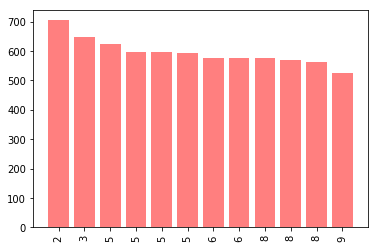

In [14]:
#Hypothesis 1: create bar chart of counts
x_axis = np.arange(len(month_counts_df))
tick_locations = [value for value in x_axis]

#create a list indicating where to write x labels and set figure size to adjust for space
plt.bar(x_axis, month_counts_df, color='r', alpha=0.5,
        align="center")
month_counts_df
plt.xticks(tick_locations, burglary_df["Occurrence Month"], rotation="vertical")

In [19]:
#Hypothesis 1: Create report of statistic variance for months of June, July, August
#prove or disprove hypothesis that more crimes occur during the summer months
#t-tests
#t-tests allow you to compare your sample mean to the population mean
                #assumptions
                #data is normally distributed
                #data is independent
                #data is randomly sampled
#select rows 6, 7, 8 from the series (June, July, August)
month_counts_df = month_counts_df.reset_index()
sample = month_counts_df[month_counts_df["index"].isin([6,7,8])]
stats.ttest_1samp(sample, month_counts_df.mean())

Ttest_1sampResult(statistic=index               0.866025
Occurrence Month   -1.361603
dtype: float64, pvalue=array([0.47776703, 0.30641976]))

In [38]:
#Hypothesis 2: most burglaries occur during daytime hours (Ed)
#compare time of occurrance
#time_frame 0500 - 1200
#time_frame 1200 - 2200
#time_frame 2200 - 0500

#Changed DF to a more granular Datafields
new_burglary_df = burglary_df[["Area Name", 
                               "Crime Code Description", 
                               "Date Occurred", 
                               "Date Reported", 
                               "DR #", "Latitude", 
                               "Longitude", "Location", 
                               "Time Occurred", 
                               "Occurrence Month"]].reset_index(drop=True)

new_burglary_df.head()

,Area Name,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,Time Occurred,Occurrence Month
0,Central,BURGLARY,2010-02-25,2010-02-25,100100650,34.0617,-118.2469,500 N FIGUEROA ST,0030,2
1,Central,BURGLARY,2010-03-23,2010-03-25,100100743,34.0320,-118.2667,200 W WASHINGTON BL,0125,3
2,Central,BURGLARY,2010-05-05,2010-05-05,100100879,34.0416,-118.2620,1100 S GRAND AV,1500,5
3,Central,BURGLARY,2010-05-10,2010-05-10,100100900,34.0673,-118.2354,400 COTTAGE HOME ST,1105,5
4,Central,BURGLARY,2010-05-15,2010-06-05,100101000,34.0444,-118.2628,700 W OLYMPIC BL,1000,5


In [39]:
# time_frame _0500_1200 = new_burglary_df[(time_frame _0500_1200["Time Occurred"]
# type(new_burglary_df)
new_burglary_df["Parsed_Time"] = pd.to_datetime(new_burglary_df["Time Occurred"], format="%H%M")
new_burglary_df["Parsed_Time"] = new_burglary_df["Parsed_Time"].apply(lambda d: d.time())

In [33]:
#work with time module
from datetime import time
#timeframe 0500 - 1200
test_df = new_burglary_df[(new_burglary_df["Parsed_Time"] > datetime.time(5,0)) & (new_burglary_df["Parsed_Time"] < datetime.time(12,0))]
test_df

,Area Name,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,Time Occurred,Occurrence Month,Parsed_Time
3,Central,BURGLARY,2010-05-10,2010-05-10,100100900,34.0673,-118.2354,400 COTTAGE HOME ST,1105,5,11:05:00
4,Central,BURGLARY,2010-05-15,2010-06-05,100101000,34.0444,-118.2628,700 W OLYMPIC BL,1000,5,10:00:00
7,Central,BURGLARY,2010-06-28,2010-06-29,100101139,34.0482,-118.2472,400 S MAIN ST,1000,6,10:00:00
18,Central,BURGLARY,2010-01-08,2010-01-09,100104445,34.0551,-118.2545,300 S FIGUEROA ST,0645,1,06:45:00
35,Central,BURGLARY,2010-02-18,2010-02-24,100106867,34.0439,-118.2514,100 W 7TH ST,0900,2,09:00:00
36,Central,BURGLARY,2010-02-25,2010-02-25,100106903,34.0482,-118.2472,400 S MAIN ST,1000,2,10:00:00
39,Central,BURGLARY,2010-03-05,2010-03-05,100107305,34.0371,-118.2672,1500 S HOPE ST,0830,3,08:30:00
43,Central,BURGLARY,2010-03-16,2010-03-17,100107825,34.0317,-118.2641,1800 S MAIN ST,0830,3,08:30:00
44,Central,BURGLARY,2010-03-18,2010-03-18,100107973,34.0435,-118.2471,600 WALL ST,0800,3,08:00:00
47,Central,BURGLARY,2010-03-20,2010-03-20,100108082,34.0350,-118.2615,1400 S MAIN ST,0830,3,08:30:00


In [34]:

test_df = new_burglary_df[(new_burglary_df["Parsed_Time"] > datetime.time(12,0)) & (new_burglary_df["Parsed_Time"] < datetime.time(22,0))]
test_df

,Area Name,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,Time Occurred,Occurrence Month,Parsed_Time
2,Central,BURGLARY,2010-05-05,2010-05-05,100100879,34.0416,-118.2620,1100 S GRAND AV,1500,5,15:00:00
5,Central,BURGLARY,2010-05-12,2010-06-05,100101001,34.0444,-118.2628,700 W OLYMPIC BL,2100,5,21:00:00
6,Central,BURGLARY,2010-06-12,2010-06-13,100101035,34.0394,-118.2496,800 SAN JULIAN ST,2058,6,20:58:00
8,Central,BURGLARY,2010-08-06,2010-08-07,100101319,34.0413,-118.2517,300 E 8TH ST,1730,8,17:30:00
9,Central,BURGLARY,2010-08-06,2010-08-07,100101320,34.0413,-118.2517,300 E 8TH ST,1730,8,17:30:00
13,Central,BURGLARY,2010-10-19,2010-10-20,100101527,34.0509,-118.2585,600 S FIGUEROA ST,2100,10,21:00:00
16,Central,BURGLARY,2010-01-01,2010-01-02,100104083,34.0673,-118.2499,900 EVERETT ST,1600,1,16:00:00
17,Central,BURGLARY,2010-01-07,2010-01-08,100104410,34.0467,-118.2485,500 S MAIN ST,1900,1,19:00:00
19,Central,BURGLARY,2010-01-13,2010-01-13,100104749,34.0455,-118.2381,300 S ALAMEDA ST,1850,1,18:50:00
23,Central,BURGLARY,2010-01-19,2010-01-20,100105072,34.0461,-118.2476,500 S LOS ANGELES ST,1700,1,17:00:00


In [46]:
test_df = new_burglary_df[(new_burglary_df["Parsed_Time"] > datetime.time(22,0)) | (new_burglary_df["Parsed_Time"] < datetime.time(5,0))]
test_df

,Area Name,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,Time Occurred,Occurrence Month,Parsed_Time
0,Central,BURGLARY,2010-02-25,2010-02-25,100100650,34.0617,-118.2469,500 N FIGUEROA ST,0030,2,00:30:00
1,Central,BURGLARY,2010-03-23,2010-03-25,100100743,34.0320,-118.2667,200 W WASHINGTON BL,0125,3,01:25:00
10,Central,BURGLARY,2010-08-27,2010-08-28,100101407,34.0408,-118.2511,400 E 8TH ST,2255,8,22:55:00
11,Central,BURGLARY,2010-09-13,2010-09-13,100101441,34.0375,-118.2700,1600 S FIGUEROA ST,0250,9,02:50:00
12,Central,BURGLARY,2010-09-12,2010-09-13,100101442,34.0467,-118.2556,500 W 7TH ST,2300,9,23:00:00
14,Central,BURGLARY,2010-10-24,2010-10-24,100101544,34.0559,-118.2296,700 E CESAR E CHAVEZ AV,0230,10,02:30:00
15,Central,BURGLARY,2010-12-03,2010-12-03,100101669,34.0439,-118.2514,700 S MAIN ST,0025,12,00:25:00
20,Central,BURGLARY,2010-01-16,2010-01-17,100104912,34.0474,-118.2496,500 S SPRING ST,2330,1,23:30:00
21,Central,BURGLARY,2010-01-15,2010-01-17,100104935,34.0641,-118.2480,1000 W SUNSET BL,2300,1,23:00:00
22,Central,BURGLARY,2010-01-18,2010-01-18,100104972,34.0453,-118.2499,600 S MAIN ST,0100,1,01:00:00


ValueError: shape mismatch: objects cannot be broadcast to a single shape

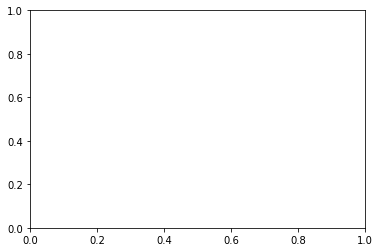

In [47]:
objects = ('5-12', '12-10', '22-0500')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time')
plt.title('Time of Occurrence')

plt.show()

In [ ]:
#Hypothesis 3: most burglaries occur during weekdays
    #convert a date to day of the week
    #use pandas.DatetimeIndex.dayofweek